In [6]:
import numpy as np
import pandas as pd

### Reading Raw DATA

In [30]:
raw_data = pd.read_csv(
    "data/challenge_data.csv",
    index_col=0,
    dtype={0:int}
    )
raw_data.sort_index(inplace=True)

raw_data_annotation = pd.read_csv(
    "data/challenge_annotation.csv",
    index_col=0,
    dtype={0:int}
    )

raw_data_annotation.sort_index(inplace=True)


In [31]:
raw_data.head()

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB
1607130720314,5063.135,19.548731,522.503986,18.982,0.0,0.0,5795.817,13.38
1607130720822,5063.135,15.586150,523.159986,19.068,0.0,0.0,5795.817,12.73
1607130721329,5062.959,18.492043,524.441986,19.164,0.0,0.0,5795.817,11.45
1607130721838,5062.959,16.114494,525.053986,19.249,0.0,0.0,5795.817,10.84
1607130722346,5062.778,17.699526,526.081986,19.347,0.0,0.0,5795.817,9.81


In [27]:
raw_data.shape

(40673, 8)


In [32]:
raw_data_annotation.head()

,Annotation
1607130862000,off_slips
1607130880000,on_slips
1607130966000,off_slips
1607131206000,on_slips
1607131297000,off_slips


In [33]:
raw_data_annotation.shape

(109, 1)


In [29]:
raw_data_annotation.value_counts('Annotation')

Annotation
off_slips    55
on_slips     54
Name: count, dtype: int64

It is now necessary to combine the two dataframes. An outer join is employed to preserve the size of the main dataframe. Since the index represents a timestamp, both dataframes need to be sorted in order to analyze the continuity of the target.

In [36]:
raw_data_full  = raw_data.join(
    raw_data_annotation,
    how = 'outer'
    )

In [37]:
raw_data_full.shape

(40782, 9)

In [39]:
raw_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40782 entries, 1607130720314 to 1607151059636
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BDEP        40673 non-null  float64
 1   TPO         40660 non-null  float64
 2   HL          40671 non-null  float64
 3   BHT         40658 non-null  float64
 4   RPM         40647 non-null  float64
 5   TOR         40656 non-null  float64
 6   DEPT        40651 non-null  float64
 7   WOB         40651 non-null  float64
 8   Annotation  109 non-null    object 
dtypes: float64(8), object(1)
memory usage: 3.1+ MB


### PRE-PROCESS DATA

#### TARGET

The chosen approach to address NaN values in the target variable ("Annotation") is to fill them with "on_slips" based on the information provided in the metadata file. According to the metadata, the value "off_slips" remains constant until the occurrence of the next annotation. Therefore, "on_slips" is used as a substitute for the missing values, ensuring consistency with the described behavior of the variable.

In [44]:
raw_data_full.Annotation.fillna(
    "on_slips",
    inplace=True
)

In [45]:
raw_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40782 entries, 1607130720314 to 1607151059636
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BDEP        40673 non-null  float64
 1   TPO         40660 non-null  float64
 2   HL          40671 non-null  float64
 3   BHT         40658 non-null  float64
 4   RPM         40647 non-null  float64
 5   TOR         40656 non-null  float64
 6   DEPT        40651 non-null  float64
 7   WOB         40651 non-null  float64
 8   Annotation  40782 non-null  object 
dtypes: float64(8), object(1)
memory usage: 3.1+ MB


In [46]:
raw_data_full.head()

,BDEP,TPO,HL,BHT,RPM,TOR,DEPT,WOB,Annotation
1607130720314,5063.135,19.548731,522.503986,18.982,0.0,0.0,5795.817,13.38,on_slips
1607130720822,5063.135,15.586150,523.159986,19.068,0.0,0.0,5795.817,12.73,on_slips
1607130721329,5062.959,18.492043,524.441986,19.164,0.0,0.0,5795.817,11.45,on_slips
1607130721838,5062.959,16.114494,525.053986,19.249,0.0,0.0,5795.817,10.84,on_slips
1607130722346,5062.778,17.699526,526.081986,19.347,0.0,0.0,5795.817,9.81,on_slips


In [59]:
raw_data_full.value_counts('Annotation')

Annotation
0    27557
1    13225
Name: count, dtype: int64

<Axes: >

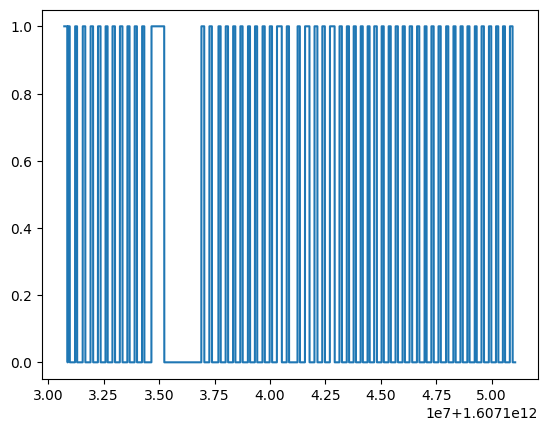

In [57]:

raw_data_full['Annotation'].replace(
    {'off_slips':0, 'on_slips':1}
    )\
        .plot()

#### FEATURES

In [61]:
raw_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40782 entries, 1607130720314 to 1607151059636
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BDEP        40673 non-null  float64
 1   TPO         40660 non-null  float64
 2   HL          40671 non-null  float64
 3   BHT         40658 non-null  float64
 4   RPM         40647 non-null  float64
 5   TOR         40656 non-null  float64
 6   DEPT        40651 non-null  float64
 7   WOB         40651 non-null  float64
 8   Annotation  40782 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 3.1 MB


Applying the same logic as used for the target variable, the strategy employed to maintain time continuity of the variables involves using the "ffill" method to fill the NaN values. This approach ensures that missing values are filled with the last observed non-null value, thereby preserving the temporal sequence of the data. By forward-filling, each variable retains its most recent valid value, facilitating the analysis and interpretation of the dataset while preserving the integrity of the time series.

In [62]:
df_full = raw_data_full.fillna(method='ffill')

In [63]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40782 entries, 1607130720314 to 1607151059636
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BDEP        40782 non-null  float64
 1   TPO         40782 non-null  float64
 2   HL          40782 non-null  float64
 3   BHT         40782 non-null  float64
 4   RPM         40782 non-null  float64
 5   TOR         40782 non-null  float64
 6   DEPT        40782 non-null  float64
 7   WOB         40782 non-null  float64
 8   Annotation  40782 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 3.1 MB


Now that the DataFrame has been processed to include the target variable and all the features without any missing values, we can proceed with the Exploratory Data Analysis (EDA). To maintain organization and facilitate further analysis, the updated DataFrame will be saved in the "data" folder. Additionally, a new notebook will be created exclusively for the EDA, where the saved DataFrame will be loaded for further exploration and visualization.

In [64]:
df_full.to_csv("data/data_full.csv")